In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [44]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [4]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:xlabel='TV', ylabel='Sales'>

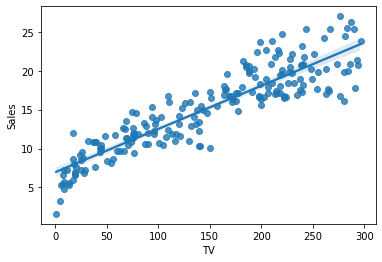

In [8]:
#visualize the data

sns.regplot(x="TV", y="Sales", data= advertising)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

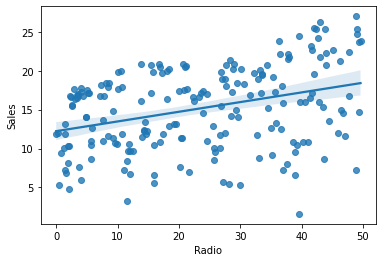

In [9]:
sns.regplot(x="Radio", y="Sales", data= advertising)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

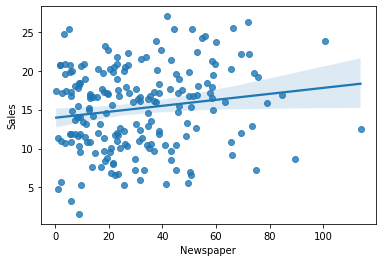

In [10]:
sns.regplot(x="Newspaper", y="Sales", data= advertising)

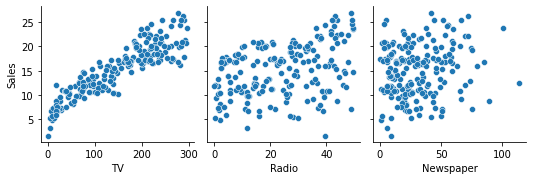

In [11]:
sns.pairplot(data= advertising, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales")

In [12]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

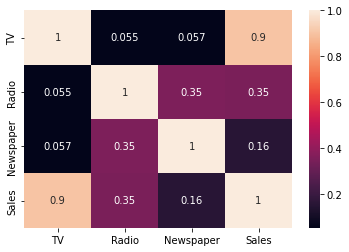

In [13]:
#heatmap
sns.heatmap(advertising.corr(), annot=True)

Equation of linear regression:

y = c + m1x1 +m2x2 +.....+mnxn

y is the response
c is the intercept
m1 is the coefficient for the first feature
m2 is the coefficient for the nth feature

In our case:
y = c + m1 *TV 

(Since 'TV' is very strongly correlated to 'Sales', let's first build a simple linear regression model with ‘TV’ as the predictor variable)

The m values are called the model coefficients or model parameters

Steps for model building:

-create X and Y

-create train and test sets (70-30, 80-20 split)

-Train model on training set (ie learn the coefficients)

-Evaluate the model (Test set, training set)


In [14]:
#creating X and Y
X = advertising['TV']
y = advertising['Sales']

In [15]:
#training-testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)
X_train.shape
X_test.shape

(60,)

In [16]:
#training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [17]:
#fitting the model

#lr is an object 
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [18]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.52e-52
Time:                        10:14:12   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#prediction on training set
y_train_pred = lr_model.predict(X_train_sm)

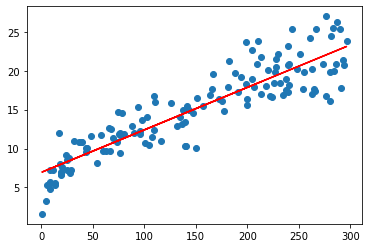

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

In [24]:
#Running residual analysis
#error= f(y_train, y_train_pred)

In [25]:
res = y_train - y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residual Plot')

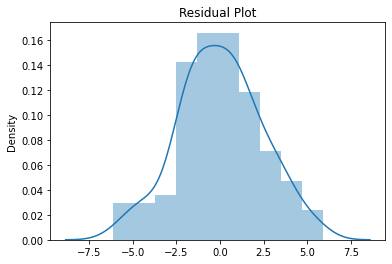

In [26]:
#plotting the residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

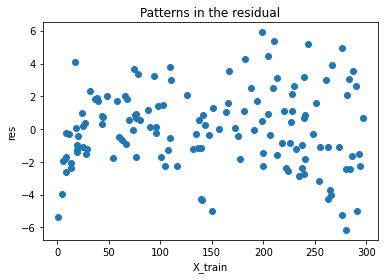

In [29]:
#looking for patterns in the residual
plt.scatter(X_train, res)
plt.title('Patterns in the residual')
plt.xlabel('X_train') 
plt.ylabel('res')
plt.show()

In [35]:
#Making predicitons and evaluation on the test set(y_test_prod)
#evaluate the model, r-squared, on the test 

In [33]:
#add a cons/intercept to test
X_test_sm = sm.add_constant(X_test)

#prediction on test set
y_test_pred = lr_model.predict(X_test_sm)

In [37]:
#evaluate the model, r-squared, on the test 
#r-squared
r2 = r2_score(y_true= y_test, y_pred=y_test_pred)
r2

0.792103160124566

In [38]:
#r2 on train
r2 = r2_score(y_true= y_train, y_pred=y_train_pred)
r2

0.8157933136480389

In [39]:
#mean squared error
mean_squared_error(y_true= y_test, y_pred=y_test_pred)

4.077556371826953

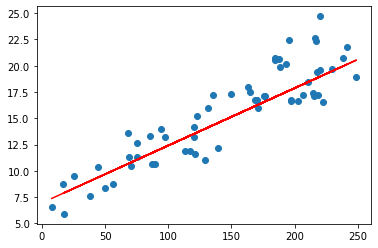

In [40]:
#visualising test predictions
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Linear Regression using sklearn

In [41]:
#training-testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [52]:
#reshape X_train to (n,1)
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [51]:
X_train_lm.shape

(140, 1)

In [53]:
#steps in sklearn model building

# 1. create an object for linear regression
lm = LinearRegression()

# 2. fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [57]:
# 3. see the params, make predictions on (train, test) sets
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [58]:
#make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [61]:
# 4. evaluate the model(r2, etc)
print(r2_score(y_true= y_train, y_pred=y_train_pred))
print(r2_score(y_true= y_test, y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
